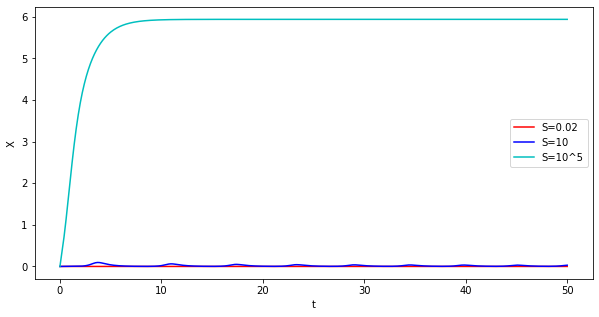

In [42]:
#Problem 2 - (d)
import numpy as np
from scipy.integrate import *
import matplotlib.pyplot as plt
m = 500
Signal = np.array([0.02, 10, np.power(10, 5)])
S = Signal
t = np.linspace(0, 50, m)
aX = 0.039; 
aY = 0.0043; 
bX = 6.1; 
bY = 5.7;
dY = 1.05;
dZ = 1.04;
zX = 0.000013;
yZ = 0.011;
xZ = 0.12;
xY = 0.00079;
nZx = 2.32;
n = 2;
X_store = np.zeros((m, np.size(S)))

for q in range(np.size(S)):
    def circuit(XYZ, t = np.linspace(0, 50, 500)):
        X, Y, Z = XYZ
        G = np.empty((3))
        G[0] = ((aX + bX*S[q])/(1 + S[q] + np.power(Z/zX, nZx))) - X
        G[1] = ((aY + bY*S[q])/(1 + S[q] + np.power(X/xY, n))) - (dY*Y)
        G[2] = (1/(1 + np.power(X/xZ, n) + np.power(Y/yZ, n))) - (dZ*Z)
        return G
    XYZ0 = [0,0,0]
    solve = odeint(circuit, XYZ0, t) 
    X_ans = solve[:,0]
    X_store[:,q] = X_ans
X_1 = X_store[:, 0] 
X_2 = X_store[:, 1]
X_3 = X_store[:, 2]

plt.figure(figsize=(10,5))
plt.plot(t, X_1,'r', label = 'S=0.02')
plt.plot(t, X_2,'b', label = 'S=10')
plt.plot(t, X_3,'c', label = 'S=10^5')
plt.xlabel('t')
plt.ylabel('X')
plt.legend(loc='best');


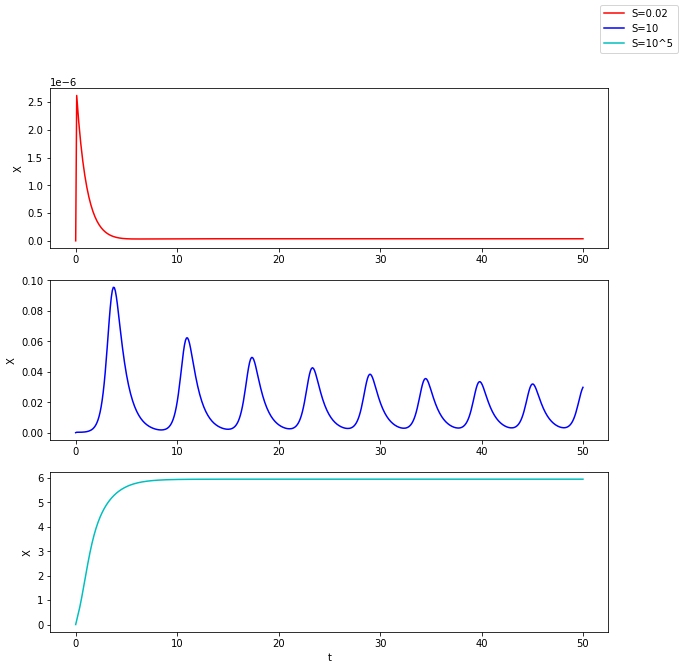

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10,10))
ax1.plot(t, X_1, 'r', label = 'S=0.02');
ax2.plot(t, X_2, 'b', label = 'S=10');
ax3.plot(t, X_3, 'c', label = 'S=10^5');
ax1.set_ylabel('X')
ax2.set_ylabel('X')
ax3.set_ylabel('X')
ax3.set_xlabel('t')
fig.legend(loc = 'upper right');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power


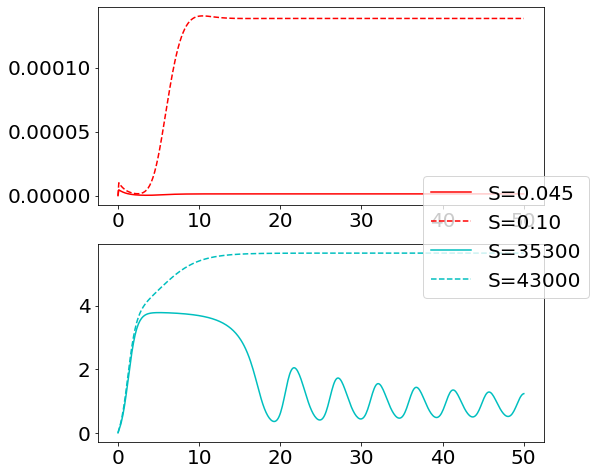

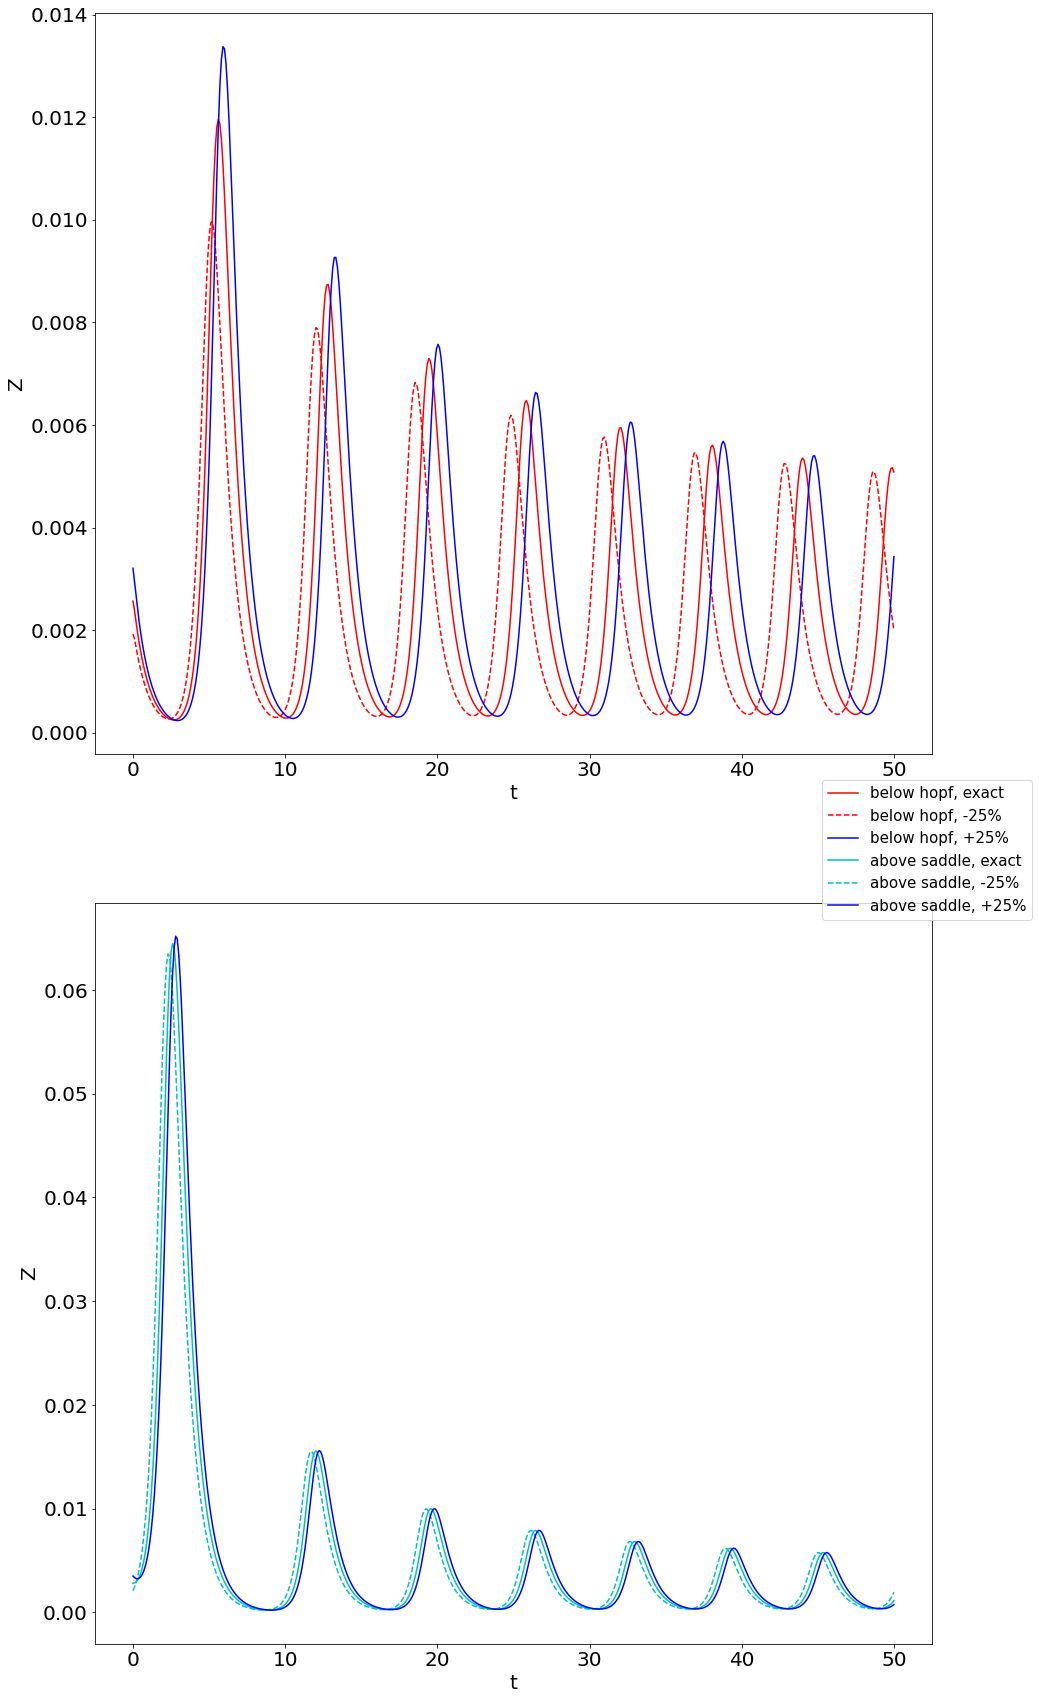

In [110]:
#Finding Hopf and saddle point
aX = 0.039; 
aY = 0.0043; 
bX = 6.1; 
bY = 5.7;
dY = 1.05;
dZ = 1.04;
zX = 0.000013;
yZ = 0.011;
xZ = 0.12;
xY = 0.00079;
nZx = 2.32;
n = 2;
for q in range(np.size(S)):
    def circuit(XYZ, t = np.linspace(0, 50, 500)):
        X, Y, Z = XYZ
        G = np.empty((3))
        G[0] = ((aX + bX*S[q])/(1 + S[q] + np.power(Z/zX, nZx))) - X
        G[1] = ((aY + bY*S[q])/(1 + S[q] + np.power(X/xY, n))) - (dY*Y)
        G[2] = (1/(1 + np.power(X/xZ, n) + np.power(Y/yZ, n))) - (dZ*Z)
        return G
XYZ0 = [0,0,0]
S = [0.04, 0.10, 35300, 43000]

q = 0; solve = odeint(circuit, XYZ0, t);
x0 = solve[:,0]
q = 1; solve = odeint(circuit, XYZ0, t);
x1 = solve[:,0]
q = 2; solve = odeint(circuit, XYZ0, t);
x2 = solve[:,0]
q = 3; solve = odeint(circuit, XYZ0, t);
x3 = solve[:,0]

fig,(ax1,ax2) = plt.subplots(2, figsize = (8, 8))
ax1.plot(t, x0,'r', label = 'S=0.045');
ax1.plot(t, x1,'r--', label = 'S=0.10');
ax2.plot(t, x2,'c', label = 'S=35300');
ax2.plot(t, x3,'c--', label = 'S=43000');
fig.legend(loc = 'right');


lowS = 0.04; highS = 43000;
S = [lowS, highS]
q = 0;
xyz = np.array([0,0,0])
Xa,Ya,Za = fsolve(circuit, xyz)
exact1 = np.array([Xa,Ya,Za])
e1_low = exact1*0.75
e1_high = exact1*1.25 
q = 1; 
Xb,Yb,Zb = fsolve(circuit, xyz)
exact2 = np.array([Xb,Yb,Zb]) 
e2_low = exact2*0.75 
e2_high = exact2*1.25 
S = [100,100]; 
q = 0;
odez1 = odeint(circuit, exact1,t) 
z1 = odez1[:,2]
odez1_low = odeint(circuit, e1_low, t) 
z1_low = odez1_low[:,2]
odez1_high = odeint(circuit, e1_high,t) 
z1_high = odez1_high[:,2]
odez2 = odeint(circuit, exact2,t) 
z2 = odez2[:,2]
odez2_low = odeint(circuit, e2_low, t) 
z2_low = odez2_low[:,2]
odez2_high = odeint(circuit, e2_high, t) 
z2_high = odez2_high[:,2]

fig,(ax1,ax2) = plt.subplots(2, figsize = (15, 30))
plt.rcParams.update({'font.size': 15})
ax1.plot(t, z1,'r', label = 'below hopf, exact');
ax1.plot(t, z1_low,'r--', label = 'below hopf, -25%');
ax1.plot(t, z1_high,'b', label = 'below hopf, +25%')
ax2.plot(t, z2,'c', label = 'above saddle, exact');
ax2.plot(t, z2_low,'c--', label = 'above saddle, -25%');
ax2.plot(t, z2_high,'b', label = 'above saddle, +25%');
ax1.set_xlabel('t')
ax2.set_xlabel('t')
ax1.set_ylabel('Z')
ax2.set_ylabel('Z')
fig.legend(loc = 'right');